In [27]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [28]:
df = pd.read_csv("PMGSY.csv")
df.head()


,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andaman And Nicobar,Nicobar,PMGSY-III,10,0,0,0,10,0,102.585,116.3138,0.000,0.0000,102.585
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-III,14,0,0,0,14,0,69.756,82.6236,0.000,0.0000,69.756
2,Andaman And Nicobar,South Andaman,PMGSY-II,11,0,11,0,0,0,20.082,10.4095,17.747,9.3810,0.000
3,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,16,5,1,1952.378,775.6992,1809.482,702.0291,24.340
4,Andhra Pradesh,Chittoor,PMGSY-I,148,3,148,3,0,0,482.261,101.8512,471.991,100.7436,0.000


In [29]:
df.shape


(2296, 14)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296 entries, 0 to 2295
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STATE_NAME                         2296 non-null   object 
 1   DISTRICT_NAME                      2296 non-null   object 
 2   PMGSY_SCHEME                       2277 non-null   object 
 3   NO_OF_ROAD_WORK_SANCTIONED         2296 non-null   int64  
 4   NO_OF_BRIDGES_SANCTIONED           2296 non-null   int64  
 5   NO_OF_ROAD_WORKS_COMPLETED         2296 non-null   int64  
 6   NO_OF_BRIDGES_COMPLETED            2296 non-null   int64  
 7   NO_OF_ROAD_WORKS_BALANCE           2296 non-null   int64  
 8   NO_OF_BRIDGES_BALANCE              2296 non-null   int64  
 9   LENGTH_OF_ROAD_WORK_SANCTIONED_KM  2296 non-null   float64
 10  COST_OF_WORKS_SANCTIONED_LAKHS     2277 non-null   float64
 11  LENGTH_OF_ROAD_WORK_COMPLETED_KM   2296 non-null   float

In [31]:
df.isnull().sum()

STATE_NAME                            0
DISTRICT_NAME                         0
PMGSY_SCHEME                         19
NO_OF_ROAD_WORK_SANCTIONED            0
NO_OF_BRIDGES_SANCTIONED              0
NO_OF_ROAD_WORKS_COMPLETED            0
NO_OF_BRIDGES_COMPLETED               0
NO_OF_ROAD_WORKS_BALANCE              0
NO_OF_BRIDGES_BALANCE                 0
LENGTH_OF_ROAD_WORK_SANCTIONED_KM     0
COST_OF_WORKS_SANCTIONED_LAKHS       19
LENGTH_OF_ROAD_WORK_COMPLETED_KM      0
EXPENDITURE_OCCURED_LAKHS             0
LENGTH_OF_ROAD_WORK_BALANCE_KM        0
dtype: int64

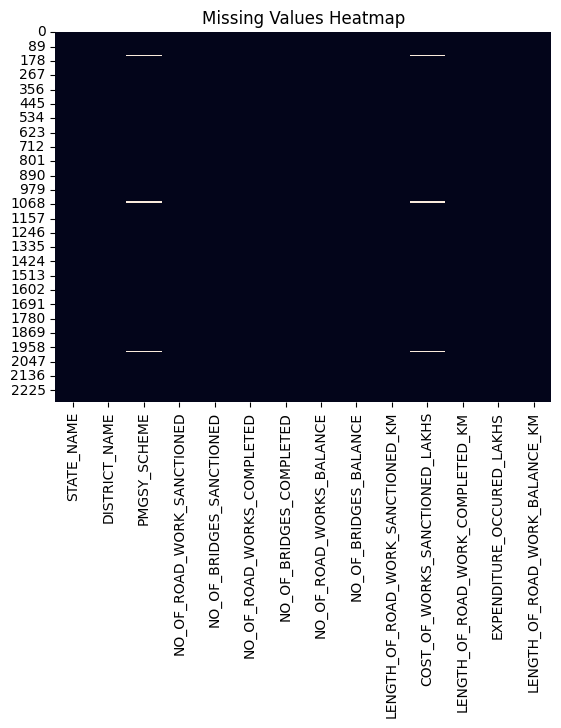

In [32]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [33]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [34]:
df.drop_duplicates(inplace=True)


In [35]:
df['PMGSY_SCHEME'].fillna(df['PMGSY_SCHEME'].mode()[0], inplace=True)
df.isnull().sum()

STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
NO_OF_BRIDGES_SANCTIONED             0
NO_OF_ROAD_WORKS_COMPLETED           0
NO_OF_BRIDGES_COMPLETED              0
NO_OF_ROAD_WORKS_BALANCE             0
NO_OF_BRIDGES_BALANCE                0
LENGTH_OF_ROAD_WORK_SANCTIONED_KM    0
COST_OF_WORKS_SANCTIONED_LAKHS       0
LENGTH_OF_ROAD_WORK_COMPLETED_KM     0
EXPENDITURE_OCCURED_LAKHS            0
LENGTH_OF_ROAD_WORK_BALANCE_KM       0
dtype: int64

In [36]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [48]:
df["completion_percent"] = df["LENGTH_OF_ROAD_WORK_COMPLETED_KM"] / df["LENGTH_OF_ROAD_WORK_SANCTIONED_KM"]
df["completion_percent"].fillna(df['completion_percent'].median(),inplace=True)


In [49]:
df["project_status"] = np.where(df["completion_percent"] >= 0.8, 1, 0)


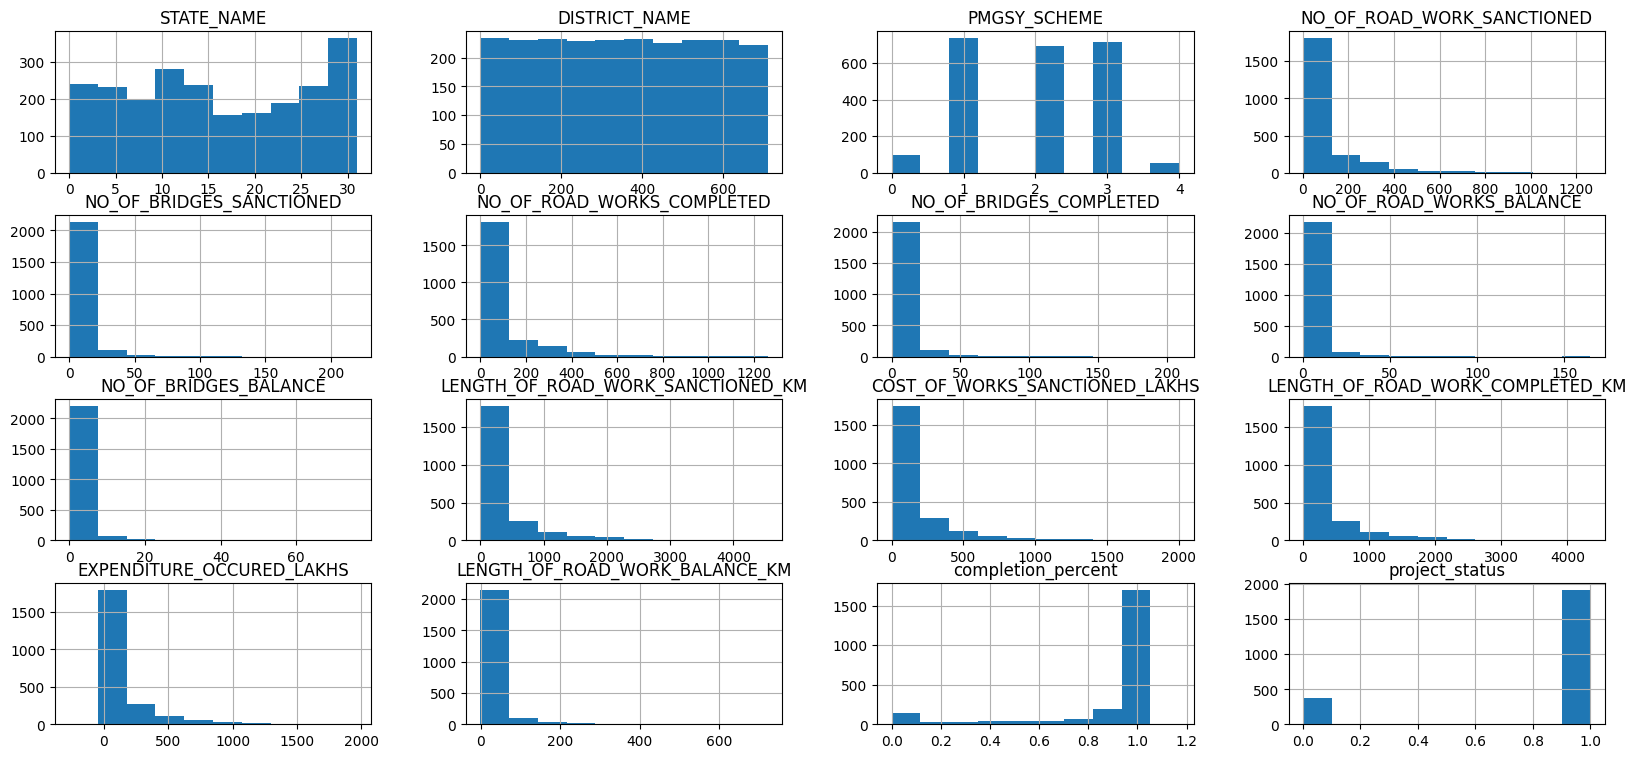

In [50]:
df.hist(figsize=(20,9))
plt.show()


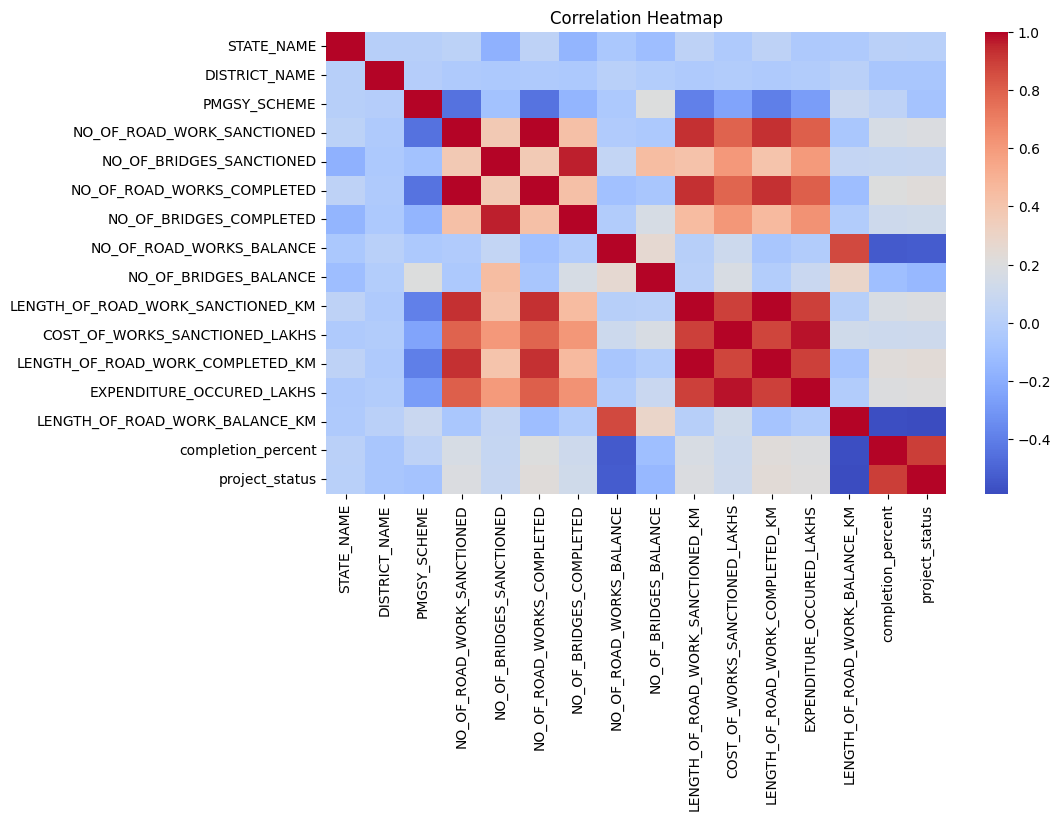

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


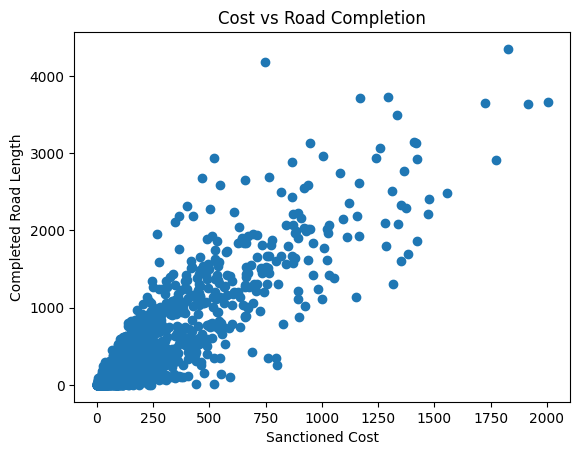

In [52]:
plt.scatter(df["COST_OF_WORKS_SANCTIONED_LAKHS"], df["LENGTH_OF_ROAD_WORK_COMPLETED_KM"])
plt.xlabel("Sanctioned Cost")
plt.ylabel("Completed Road Length")
plt.title("Cost vs Road Completion")
plt.show()


In [53]:
X = df.drop(["LENGTH_OF_ROAD_WORK_COMPLETED_KM", "project_status"], axis=1)
y = df["LENGTH_OF_ROAD_WORK_COMPLETED_KM"]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


MAE: 6.131379698018919
RMSE: 16.13364162322957
R2: 0.9991527006865084


In [56]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_lr = LinearRegression()
poly_lr.fit(X_train_p, y_train_p)

y_pred_poly = poly_lr.predict(X_test_p)

print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))
print("R2:", r2_score(y_test_p, y_pred_poly))


RMSE: 1.3633018855219578e-11
R2: 1.0


In [57]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


RMSE: 24.70697232455871
R2: 0.9980129394527718


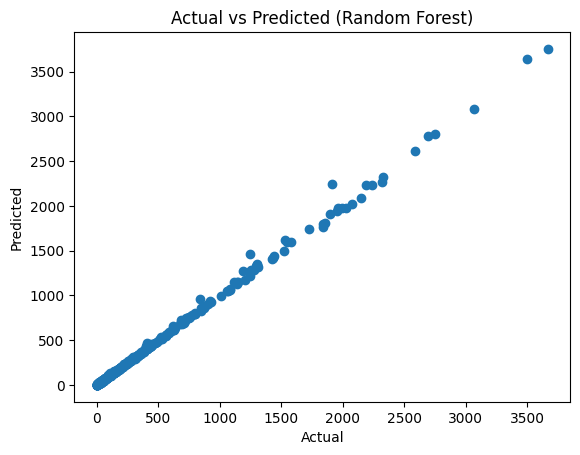

In [58]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


In [83]:
X = df.drop(["project_status"], axis=1)
y = df["project_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [84]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.991304347826087


In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9543478260869566


In [86]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9130434782608695


In [87]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [88]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


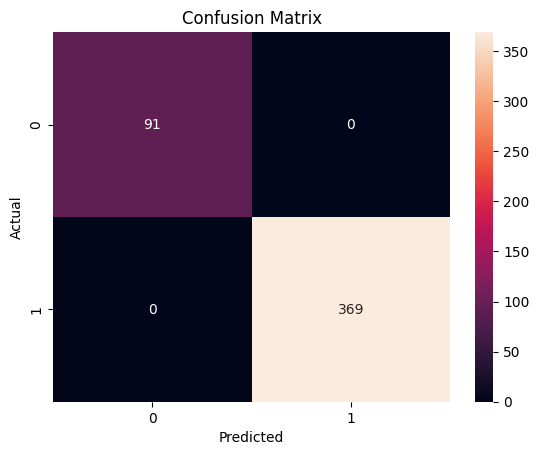

In [89]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


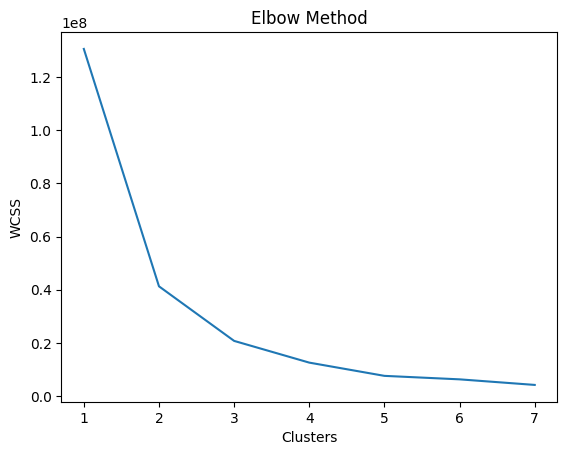

In [91]:
X_cluster = df[["completion_percent", "COST_OF_WORKS_SANCTIONED_LAKHS"]]

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8), wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


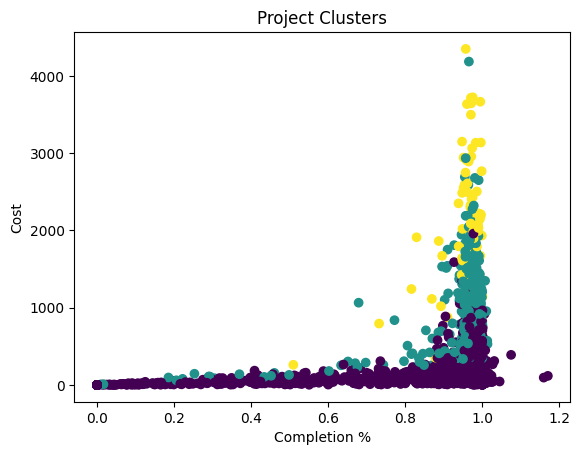

In [93]:
kmeans = KMeans(n_clusters=3)
df["cluster"] = kmeans.fit_predict(X_cluster)

plt.scatter(df["completion_percent"], df["LENGTH_OF_ROAD_WORK_COMPLETED_KM"], c=df["cluster"])
plt.xlabel("Completion %")
plt.ylabel("Cost")
plt.title("Project Clusters")
plt.show()


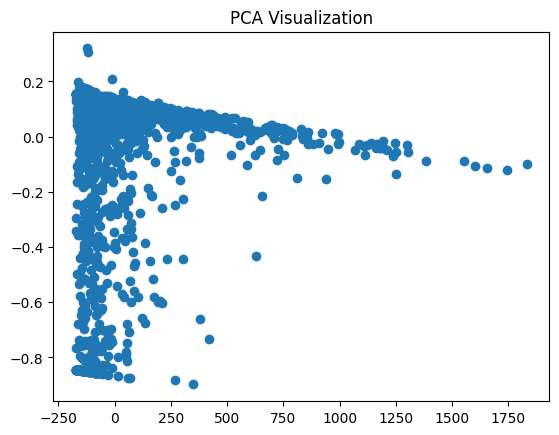

In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Visualization")
plt.show()


In [95]:
kfold = KFold(n_splits=5)

scores = cross_val_score(rf, X, y, cv=kfold)

print("Cross Validation Accuracy:", scores.mean())


Cross Validation Accuracy: 0.9991285403050109
